#In this workbook you will
- Create your own classifier for predicting delinquent customers
- Build basic reports to help interpret the effectiveness of your model
- Convert the results of your model to a credit score

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
train = pd.read_csv("./data/credit-data-trainingset.csv")
test = pd.read_csv("./data/credit-data-testset.csv")
test.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,monthly_income_imputed
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,16438.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2000.0
2,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0,1000.0
3,0,0.548458,64,0,0.209892,11362.0,7,0,1,0,2.0,7548.0
4,0,0.200923,43,0,0.430046,12300.0,10,0,2,0,0.0,6143.0


##Import some classifiers

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

##Fitting your model

In [4]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']

clf = KNeighborsClassifier(n_neighbors=13)

In [5]:
clf.fit(train[features], train.serious_dlqin2yrs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

###Generating Predictions

In [6]:
#classes (returns an array)
clf.predict(test[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
#probabilities (returns a numpy array)
clf.predict_proba(test[features])

array([[0.92307692, 0.07692308],
       [0.84615385, 0.15384615],
       [1.        , 0.        ],
       ...,
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [1.        , 0.        ]])

###Plot a histogram of the probabilities

(array([3.0879e+04, 4.4340e+03, 1.6180e+03, 5.0100e+02, 1.4300e+02,
        5.0000e+01, 1.5000e+01, 1.0000e+01, 8.0000e+00, 1.5000e+01]),
 array([0.        , 0.08461538, 0.16923077, 0.25384615, 0.33846154,
        0.42307692, 0.50769231, 0.59230769, 0.67692308, 0.76153846,
        0.84615385]),
 <a list of 10 Patch objects>)

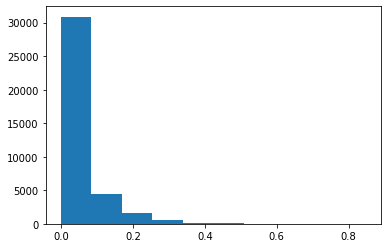

In [8]:
probs = clf.predict_proba(test[features])
prob_true = probs[::,1]
pl.hist(prob_true)

##[Evaluating your model](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [9]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [10]:
preds = clf.predict_proba(test[features])
preds

array([[0.92307692, 0.07692308],
       [0.84615385, 0.15384615],
       [1.        , 0.        ],
       ...,
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [1.        , 0.        ]])

##Classification reports

###What does this tell you?

In [11]:
confusion_matrix(test['serious_dlqin2yrs'], clf.predict(test[features]))

array([[35224,    19],
       [ 2401,    29]], dtype=int64)

In [12]:
print classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1])

SyntaxError: invalid syntax (<ipython-input-12-2230c9cc48b6>, line 1)

###Write your own version of confusion_matrix using `pandas`. Be sure to label the rows/columns.
*HINT: use crosstab*

In [ ]:
pd.crosstab(test['serious_dlqin2yrs'], clf.predict(test[features]), rownames=["Actual"], colnames=["Predicted"])

###The ROC Curve
To evaluate our classifier, we're going to use an [ROC Curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic). ROC Curves are great for evaluating binary (0, 1) classification models. A ROC Curve plots the False Postive Rate (fpr) vs. the True Positive Rate (tpr) for a classifier.

See example in [scikit-learn docs](http://scikit-learn.org/stable/auto_examples/plot_roc.html#example-plot-roc-py).

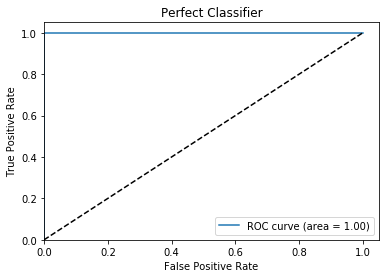

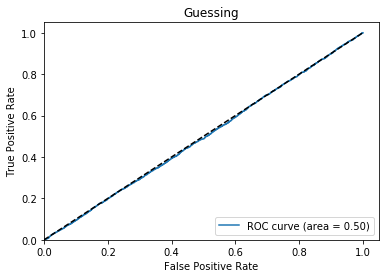

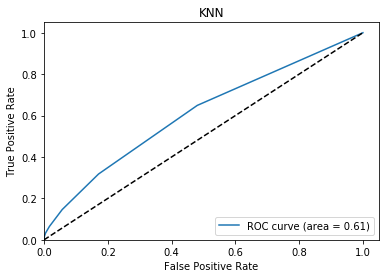

In [13]:
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(test['serious_dlqin2yrs'], probs)
    roc_auc = auc(fpr, tpr)
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.05])
    pl.ylim([0.0, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(name)
    pl.legend(loc="lower right")
    pl.show()
plot_roc("Perfect Classifier", test['serious_dlqin2yrs'])
plot_roc("Guessing", np.random.uniform(0, 1, len(test['serious_dlqin2yrs'])))

#[::,1] selects the 2nd column of the numpy array
plot_roc("KNN", preds[::,1])

In [14]:
clf = RandomForestClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

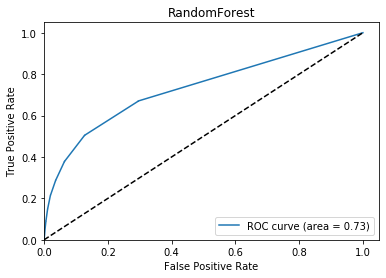

In [15]:
probs = clf.predict_proba(test[features])[::,1]
plot_roc("RandomForest", probs)

###Build your own classifier
Pick a different algorithm and a new set of features. Can you beat the 0.74 AUC?

In [16]:
train.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
2,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
3,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
4,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0


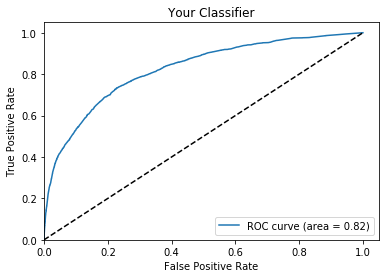

In [17]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'number_of_times90_days_late', 'number_real_estate_loans_or_lines']
clf = GradientBoostingClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
plot_roc("Your Classifier", probs)

###Converting to credit score
We're going to take the P(delinquent) outputted by the model and convert it to a FICO style score. We calculate the log odds which we then convert into 'points'. in this case, a increase/decrease in 40 points (arbritrary) means a person's riskness has halved/doubled--40/log(2). We're starting with a base score of 340 (arbitrary).

(array([   43.,   251.,   623.,  1051.,   686.,  3888.,  4688.,  4221.,
         8155., 14067.]),
 array([248.00444006, 284.02422598, 320.0440119 , 356.06379782,
        392.08358374, 428.10336966, 464.12315558, 500.14294151,
        536.16272743, 572.18251335, 608.20229927]),
 <a list of 10 Patch objects>)

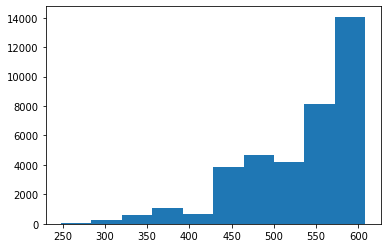

In [18]:
probs
odds = (1 - probs) / probs
score = np.log(odds)*(40/np.log(2)) + 340
pl.hist(score)

In [19]:
def convert_prob_to_score(p):
    """
    takes a probability and converts it to a score
    Example:
        convert_prob_to_score(0.1)
        466
    """
    odds = (1 - p) / p
    scores = np.log(odds)*(40/np.log(2)) + 340
    return scores.astype(np.int)

convert_prob_to_score(probs)

array([400, 381, 581, ..., 461, 454, 548])

##We just did the following

- Trained a credit classifier
- Evaluated the results by both plotting data and generating reports
- Converted the model into a credit score